In [1]:
import matplotlib.pyplot as plt
import glob
from pyrex import core

In [2]:
data_path = "/Users/yesety/Documents/AEI/projects/eccentric/catalog_ecc/"
name2=['SXS_BBH_0184','SXS_BBH_1364','SXS_BBH_1365','SXS_BBH_1366','SXS_BBH_1367','SXS_BBH_1368','SXS_BBH_1369']
e_comm2=[0,0.044,0.06,0.095,0.096,0.097,0.185] #Hinder Phys Rev D 98 2018
t_peak2=[3014.6,3200.3,3180.7,3073.2,2955.2,2850.,2616.4]

#train and test data
train_e_comm2=[e_comm2[0],e_comm2[1],e_comm2[5],e_comm2[6]]
train_name2=[name2[0],name2[1],name2[5],name2[6]]
train_peak2=[t_peak2[0],t_peak2[1],t_peak2[5],t_peak2[6]]

test_e_comm2=[e_comm2[2],e_comm2[3],e_comm2[4]]
test_name2=[name2[2],name2[3],name2[4]]
test_peak2=[t_peak2[2],t_peak2[3],t_peak2[4]]

In [3]:
train_q2=core.Glassware(q=2,chi=0,data_path=data_path,names=train_name2)
test_q2=core.Glassware(q=2,chi=0,data_path=data_path,names=test_name2)
#q3=core.Glassware(q=3,chi=0)

Text(0.5, 1.0, 'h$_{22}$')

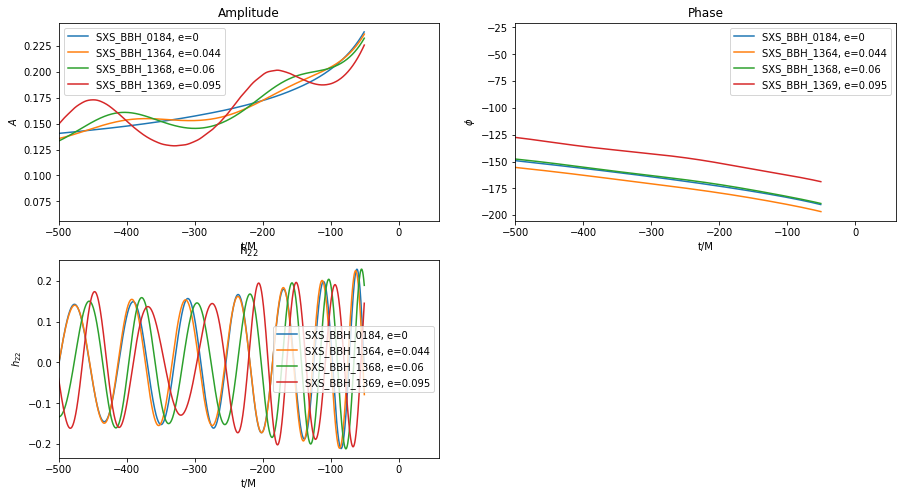

In [4]:
train_q2.components(train_peak2)

f, axs = plt.subplots(1,2,figsize=(15,8))
plt.subplot(221)
for i in range(len(train_e_comm2)):
    plt.plot(train_q2.time[i],train_q2.amp[i],label=train_q2.names[i]+str(', e=')+str(e_comm2[i]))
    plt.xlabel('t/M')
    plt.ylabel('$A$')
plt.xlim(-500,60)
plt.legend()
plt.title('Amplitude')

plt.subplot(222)
for i in range(len(train_e_comm2)):
    plt.plot(train_q2.time[i],train_q2.phase[i],label=train_q2.names[i]+str(', e=')+str(e_comm2[i]))
    plt.xlabel('t/M')
    plt.ylabel('$\phi$')
plt.xlim(-500,60)
plt.legend()
plt.title('Phase')

plt.subplot(223)
for i in range(len(train_e_comm2)):
    plt.plot(train_q2.time[i],train_q2.h22[i],label=train_q2.names[i]+str(', e=')+str(e_comm2[i]))
    plt.xlabel('t/M')
    plt.ylabel('$h_{22}$')
plt.xlim(-500,60)
plt.legend()
plt.title('h$_{22}$')

(-3000, 60)

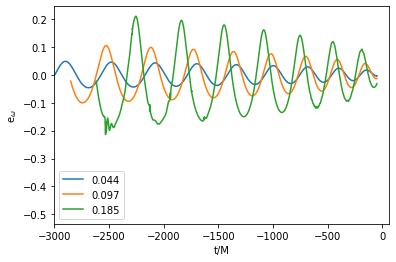

In [5]:
train_q2.compute_e_from_omega()
for i in range(len(train_name2)):
    if i>0:
        plt.plot(train_q2.time[i],train_q2.e_omega[i],label=train_e_comm2[i])
        plt.xlabel('t/M')
        plt.ylabel('e$_\omega$')
        plt.legend()
plt.xlim(-3000,60)